# HELECHO DE BARNSLEY. PRÁCTICA 4.

## Camacho López Rubén Ezequiel

In [1]:
import numpy

In [2]:
from numpy import *

In [3]:
from random import *

In [4]:
import matplotlib.pyplot as plt

### Helecho de Barnsley (Primeros datos)

In [5]:
randint(0,100)

94

In [6]:
def volado():
    i=randint(0,100)
    #El randint nos arrojará un número aleatorio para funcionar como nuestra probabilidad de casos para a,b,c,d,e y f
    if i in range (0,2):
        a,b,c,d,e,f = 0,0,0,0.16,0,0
    elif i in range (2,87):
        a,b,c,d,e,f=0.85,0.04,-0.04,0.85,0,1.6
    elif i in range (87,94):
        a,b,c,d,e,f=0.2,-0.26,0.23,0.22,0,1.6
    elif i in range (94,101):
        a,b,c,d,e,f=-0.15,0.28,0.26,0.24,0,0.44
        #Cabe aclarar que para ahorrar el uso de flotantes, el rango de cada cada caso (La probabilidad) se multiplicó
        #por 1000, de ahí que 
    L2=(a,b,c,d,e,f)
    #Se obtiene una lista con los datos correspondientes a la probabilidad obtenida para cada coeficiente
    return L2

In [7]:
def F(x,y):
    L2=volado()
    L1=(x,y)
    #El array nos sirve como auxiliar para determinar las longitudes de las listas que a futuro serán matrices
    A=array([L1[0],L1[1]])
    B=array([L2[0],L2[1],L2[2],L2[3]])
    C=array([L2[4],L2[5]])
    #Como debemos transformar las listas a matrices, .reshape nos ayuda a esto
    A2=matrix(A).reshape(2,1)
    B2=matrix(B).reshape(2,2)
    C2=matrix(C).reshape(2,1)
    #Se realiza la operación matricial que define el helecho
    return (B2*A2)+C2


In [8]:
def Barnsley(n):
    #Se definen las listas que contendrán los valores de X y Y a graficar más adelante
    Xs=[]
    Ys=[]
    archivo = open("Barnsley.txt","w")
    for z in range(n):
        #Se nos dice que debemos iniciar en F(0,0), entonces se toma z=0
        if z==0:
            V=F(0,0)
            V_x=V[0,0]
            V_y=V[1,0]
            #Como se deben realizar iteraciones, a las listas de X's y Y's se les deben ir sumando datos con .append
            Xs.append(V_x)
            Ys.append(V_y)
        elif z!=0:
            X=Xs[-1]
            Y=Ys[-1]
            Z=F(X,Y)
            Zx=Z[0,0]
            Zy=Z[1,0]
            Xs.append(Zx)
            Ys.append(Zy)
            archivo.write(str(Zx)+" "+str(Zy)+"\n")
    archivo.close()
    return Xs, Ys

In [9]:
Xs, Ys =Barnsley(15000)

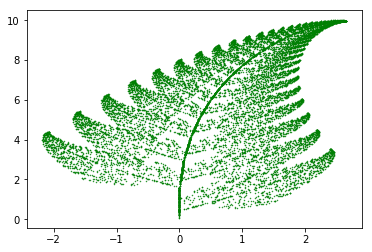

In [10]:
plt.scatter(Xs,Ys, s = 0.2, edgecolor= 'green')

### Helecho de Barnsley (segundos datos)

In [11]:
#Literalmente, se repiten los mismos pasos que en la parte 1, pero cambiando ciertos datos de a,b,c,d,e y f
def volados():
    i=randint(0,100)
    if i in range (0,3):
        a,b,c,d,e,f = 0,0,0,0.25,0,-0.4
    elif i in range (3,86):
        a,b,c,d,e,f=0.95,0.005,-0.005,0.93,-0.002,0.5
    elif i in range (86,94):
        a,b,c,d,e,f=0.035,-0.2,0.16,0.04,-0.09,0.02
    elif i in range (94,101):
        a,b,c,d,e,f=-0.04,0.2,0.16,0.04,-0.083,0.12
    L2=(a,b,c,d,e,f)
    return L2

In [12]:
def F2(x,y):
    L2=volados()
    L1=(x,y)
    A=array([L1[0],L1[1]])
    B=array([L2[0],L2[1],L2[2],L2[3]])
    C=array([L2[4],L2[5]])
    A2=matrix(A).reshape(2,1)
    B2=matrix(B).reshape(2,2)
    C2=matrix(C).reshape(2,1)
    return (B2*A2)+C2

In [13]:
def Barnsley2(n):
    Xs2=[]
    Ys2=[]
    for z in range(n):
        if z==0:
            V=F2(0,0)
            V_x=V[0,0]
            V_y=V[1,0]
            Xs2.append(V_x)
            Ys2.append(V_y)
        elif z!=0:
            X=Xs2[-1]
            Y=Ys2[-1]
            Z=F2(X,Y)
            Zx=Z[0,0]
            Zy=Z[1,0]
            Xs2.append(Zx)
            Ys2.append(Zy)
    return Xs2, Ys2

In [14]:
Xs2, Ys2 =Barnsley2(15000)

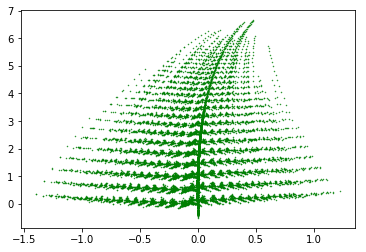

In [15]:
plt.scatter(Xs2,Ys2, s = 0.2, edgecolor= 'green')

### Rotación

In [16]:
from numpy.linalg import *

In [17]:
def Rotacion(theta, vector):
    #Se nos pide cierta matriz específica de senos y cosenos, por lo que se puede escribir desde ahora
    N=matrix([[cos(theta),-sin(theta)],[sin(theta),cos(theta)]])
    #Ya que al inicio nuestra matriz "vector" es una matriz del tipo 1x2, es necesario transponerla para poder 
    #multiplicarla por N, de ahí el uso del comando "transpose", con el cual obtenes a "vector" del tipo 2x1
    V=transpose(matrix(vector))
    return matrix(N*V)

In [18]:
def rotate(theta, txt):
    archivo=open(txt, "r")
    Xr, Yr = [], []
    for line in archivo.readlines():
        #El split para este caso, es un auxiliar para separar los datos del archivo en dos listas diferentes
        a=line.split()
        #El float nos ayuda a convertir nuestras cadenas obtenidas anteriormente para poder manejarlo
        v=[float(a[0]),float(a[1])]
        Nx, Ny = Rotacion(theta, v)
        Xr.append(Nx)
        Yr.append(Ny)
    archivo.close()
    return Xr, Yr

In [19]:
Xr, Yr =rotate(pi/4,"Barnsley.txt")
#Para este caso, el ángulo puede ser alterado a voluntad para obtener diferentes rotaciones

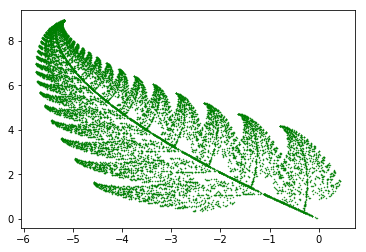

In [20]:
plt.scatter(Xr, Yr, s = 0.2, edgecolor ='green')

### ¿Giro Levógiro ó Dextrogiro?

Sabemos, por teoría, que un giro levógiro implica que algo rota en sentido contrario a las manecillas del reloj; al mismo tiempo, sabemos que un giro dextrógiro implica una rotación en sentido de las manecillas del reloj.

Dadas pruebas con theta dentro de los números positivos, se observa que el giro es levógiro; se hicieron más pruebas con theta en negativos,donde el giro fue dextrógiro.
Por lo que se puede decir que:

Si $\theta$<0, entonces hay un giro dextrógiro.

Si $\theta$>0, entonces hay un giro levógiro.

Si $\theta$=0, entonces no hay giro alguno.

(Cabe aclarar que con multiplos de $2\pi$ no se nota ningún cambio en la gráfica, aunque sí hubo fenómeno de rotación)

### Determinantes

Sabemos, por teoría, que un ángulo theta1 tanto su valor positivo como negativo, arrojará el mismo valor dentro del coseno; mientras que para el caso del seno, el signo cambiará.

Para un giro dextrógiro tenemos $\theta$<0, entonces el determinante queda:

$(cos(\theta)*cos(\theta))-(sen(\theta)*(-sen(\theta))) = (cos(\theta))^2+(sen(\theta))^2$

Lo cual es igual a 1.

Para un giro levógiro tenemos $\theta$>0, entonces el determinante queda:

$(cos(\theta)*cos(\theta))-((-sen(\theta))*(sen(\theta))) = (cos(\theta))^2+(sen(\theta))^2$

Lo cual es igual a 1.

Entonces podemos decir que para cualquier ángulo $\theta$, para este caso, el determinante siempre será 1.